In [1]:
library(ggplot2)

In [11]:
N <- 10000
a <- 0.012
b <- -0.09
k <- function(n=1){
        k<-runif(n,0.16,0.25)
        return(k)
        }
max_s_prop <- 0.7
age_max <- 70
age_step <- 1

In [12]:
## setting up the initial table for number of non-Smurfs, proportion and number of Smurfs
pop <- matrix(,nrow=4,ncol=age_max)
rownames(pop)<-c("age","Smurf_prop","n_NS","n_S")
pop[1,]<- seq(0,age_max-1,age_step)

cbind.na <- function(x, y){
    n <- max(length(x), length(y))
    length(x) <- n                      
    length(y) <- n
    combined<-cbind(x,y)
    combined[which(is.na(combined))]<-0
    return(combined)
}

Smurf <- function(age){
    age_func <- a*age+b
    smurf_prop <- ifelse(age_func>0, ifelse(age_func<max_s_prop,runif(1,0,age_func*2),runif(1,0,max_s_prop)),0)
    return(smurf_prop)
    }

pop[3,1]<-N
for(i in pop[1,]){
    pop[2,i]<-Smurf(i)
}
pop[4,1]<-round(pop[3,1]*pop[2,1], 0)
i=0
for(j in 2:length(pop[2,])){
   i=i+1 
   pop[4,j]<-round(pop[3,i]*pop[2,j] ,0)
   pop[3,j]<-pop[3,i]-pop[4,j] 
}
pop<-pop[,-length(pop[1,])]
pop

kill_Smurfs <- function(n_S){
    dyingSmurfs <- NA
    dyingSmurfs[1]<-round(n_S-n_S*exp(-k()),0)
    i<-1
    while(n_S>0){
        i=i+1
        n_S<-dyingSmurfs[i-1]
        dyingSmurfs[i]<-round(n_S-n_S*exp(-k()),0)
    }
    return(dyingSmurfs)
}


age,0,1,2,3,4,5,6,7.000000e+00,8.000000e+00,9.000000e+00,...,59.000000,60.000000,61.0000000,62.0000,63.00000000,64.0000000,65.00000000,66.0000000,67.00000000,68.0000000
Smurf_prop,0,0,0,0,0,0,0,2.281275e-03,1.871505e-02,2.073512e-03,...,1.136831,1.055906,0.4237695,1.0884,0.04543995,0.8288622,0.09353142,0.6985274,0.05568884,0.3137577
n_NS,10000,10000,10000,10000,10000,10000,10000,9.977000e+03,9.790000e+03,9.770000e+03,...,0.000000,0.000000,0.0000000,0.0000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000
n_S,0,0,0,0,0,0,0,2.300000e+01,1.870000e+02,2.000000e+01,...,0.000000,0.000000,0.0000000,0.0000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000


In [13]:
Smurf_death<-kill_Smurfs(pop[4,1])
length(Smurf_death)<-10; Smurf_death[which(is.na(Smurf_death))]<-0
for(i in pop[4,2:length(pop[4,])]){
    Smurf_death<-cbind.na(Smurf_death,kill_Smurfs(i))
}
Smurf_death<-cbind(pop[4,],t(Smurf_death))
Smurf_death[is.na(Smurf_death)]<-0
Smurf_death<-as.data.frame(Smurf_death)
rownames(Smurf_death)<-pop[1,]
colnames(Smurf_death)<-seq(1:length(Smurf_death[1,]))
#Smurf_death

Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector lengt

In [14]:
Smurfs_dyn<-NA
length(Smurfs_dyn)<-80
for(i in 1:length(Smurf_death[,1])){
    temp<-c(rep(NA,i-1),Smurf_death[i,])
    length(temp)<-80
    Smurfs_dyn<-rbind(Smurfs_dyn,temp)
    }
Smurfs_dyn<-as.data.frame(Smurfs_dyn[-1,])
colnames(Smurfs_dyn)<-seq(1,80,1)
rownames(Smurfs_dyn)<-pop[1,]
Smurfs_dyn[,1:80][Smurfs_dyn[,1:80] == "NULL"] <- 0
#Smurfs_dyn

In [15]:
Smurfs_alive<-NA
length(Smurfs_alive)<-80
for(i in 1:80){Smurfs_alive[i]=sum(as.numeric(Smurfs_dyn[,i]),na.rm=TRUE)}
pop<-rbind(pop,t(Smurfs_alive[1:69]))
rownames(pop)<-c("age","Smurf_prop","n_NS","n_S","S_alive")
pop

age,0,1,2,3,4,5,6,7.000000e+00,8.000000e+00,9.000000e+00,...,59.000000,60.000000,61.0000000,62.0000,63.00000000,64.0000000,65.00000000,66.0000000,67.00000000,68.0000000
Smurf_prop,0,0,0,0,0,0,0,2.281275e-03,1.871505e-02,2.073512e-03,...,1.136831,1.055906,0.4237695,1.0884,0.04543995,0.8288622,0.09353142,0.6985274,0.05568884,0.3137577
n_NS,10000,10000,10000,10000,10000,10000,10000,9.977000e+03,9.790000e+03,9.770000e+03,...,0.000000,0.000000,0.0000000,0.0000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000
n_S,0,0,0,0,0,0,0,2.300000e+01,1.870000e+02,2.000000e+01,...,0.000000,0.000000,0.0000000,0.0000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000
S_alive,0,0,0,0,0,0,0,2.300000e+01,1.920000e+02,5.800000e+01,...,0.000000,0.000000,0.0000000,0.0000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000


In [16]:
Smurf_surv<-as.data.frame(apply(Smurf_death,2,sum))
Smurf_surv<-cbind(as.numeric(colnames(Smurf_death)),Smurf_surv)
rownames(Smurf_surv)<-NULL
colnames(Smurf_surv)<-c("timeAsSmurf","Smurfs_alive")
head(Smurf_surv)

timeAsSmurf,Smurfs_alive
1,10000
2,1883
3,337
4,62
5,10
6,0


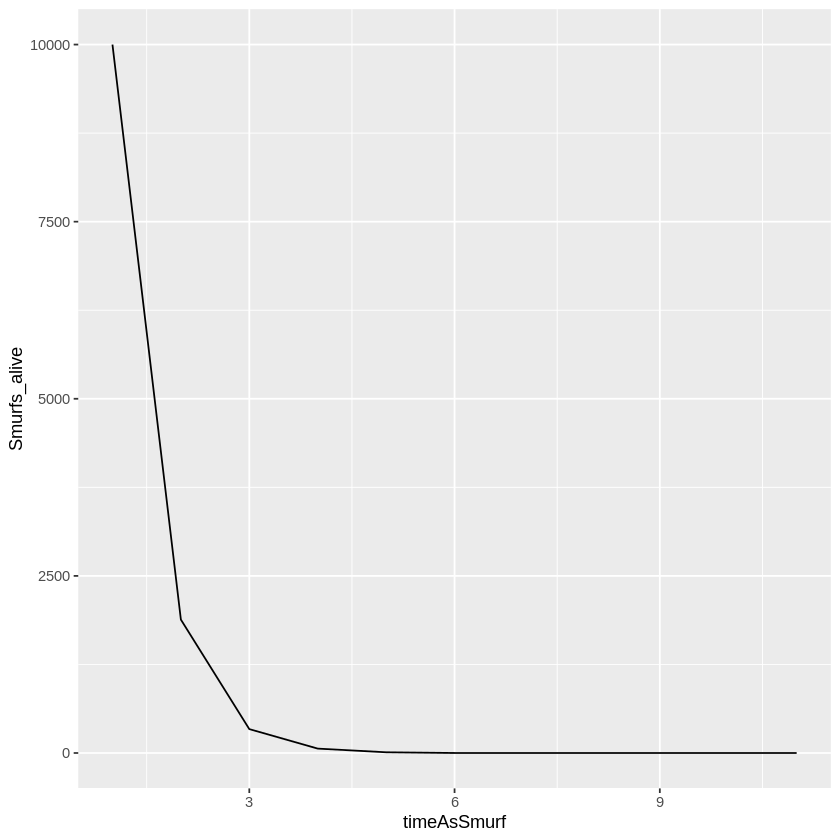

In [17]:
#Smurf survival curve
ggplot(Smurf_surv, aes(timeAsSmurf, Smurfs_alive))+
    geom_line()

In [18]:
pop<-as.data.frame(t(pop))
age_max<-min(pop$age[which(pop$n_NS<1)])

Warning message:
“Removed 25 row(s) containing missing values (geom_path).”Warning message:
“Removed 25 row(s) containing missing values (geom_path).”Warning message:
“Removed 25 row(s) containing missing values (geom_path).”Warning message:
“Removed 25 row(s) containing missing values (geom_path).”

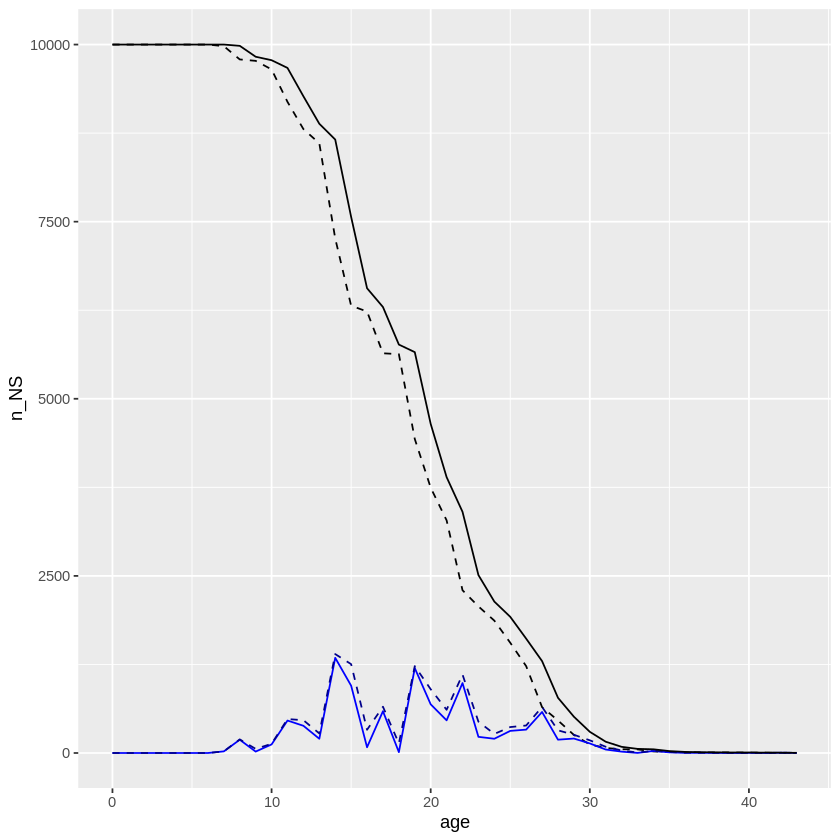

In [19]:
ggplot(pop)+
    geom_line(aes(age,n_NS), linetype="dashed")+
    geom_line(aes(age,n_S), color="blue")+
    geom_line(aes(age,S_alive), color="dark blue", linetype="dashed")+
    geom_line(aes(age,n_NS+S_alive))+
    xlim(0,age_max)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 25 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 25 rows containing missing values (geom_point).”Warning message:
“Removed 8 rows containing missing values (geom_smooth).”

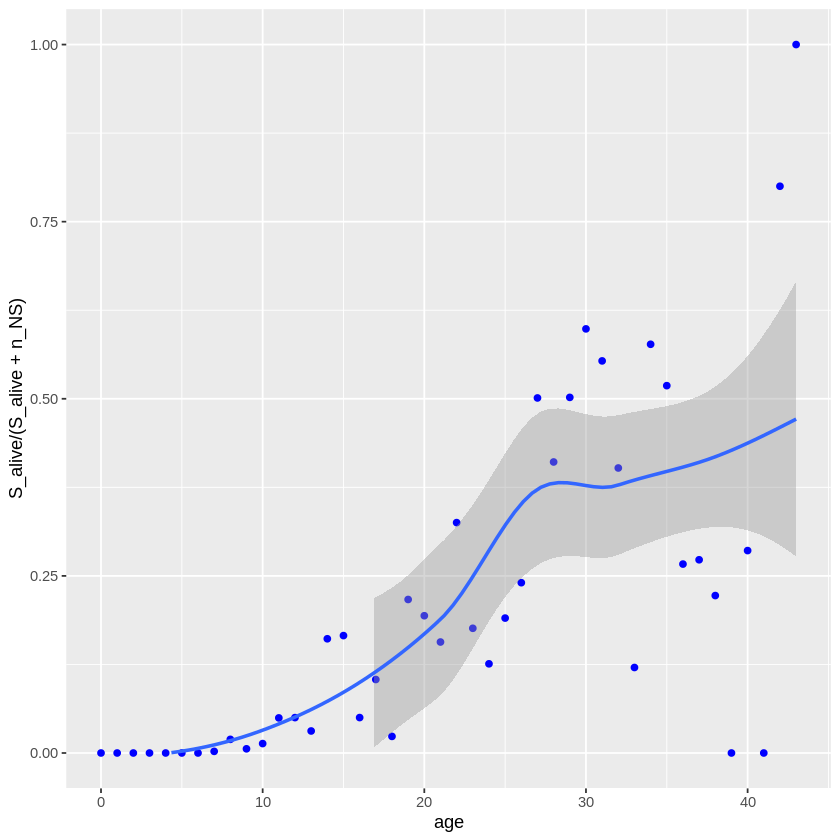

In [23]:
ggplot(pop)+
    geom_point(aes(x=age,y=S_alive/(S_alive+n_NS)), color="blue")+
    geom_smooth(aes(x=age,y=S_alive/(S_alive+n_NS)))+
    ylim(0,1)+
    xlim(0,age_max)  